# 학습 데이터셋 생성

### 라이브러리 임포트

In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 데이터 로드

In [3]:
robot_data = pd.read_csv("./1. preprocessing_Data/test1/train_data_68_0.05.csv", encoding='CP949')

In [4]:
robot_data

,temp_x_1,temp_x_2,temp_x_3,temp_x_4,temp_x_5,temp_x_6,temp_x_7,temp_x_8
0,0.180,0.292,0.794,0.108,0.456,1.000,0.385,0.978
1,0.194,0.293,0.769,0.136,0.450,0.978,0.401,0.989
2,0.209,0.310,0.754,0.169,0.460,0.956,0.399,0.981
3,0.213,0.342,0.758,0.185,0.490,0.953,0.379,0.991
4,0.212,0.379,0.767,0.200,0.524,0.954,0.359,0.987
...,...,...,...,...,...,...,...,...
746,0.174,0.069,0.798,0.110,0.249,0.854,0.260,0.966
747,0.163,0.067,0.835,0.132,0.243,0.836,0.272,0.972
748,0.143,0.067,0.874,0.114,0.250,0.852,0.261,0.972
749,0.127,0.067,0.900,0.087,0.259,0.876,0.246,0.972


## Position

In [5]:
data_1 = robot_data[["temp_x_1"]].squeeze().to_numpy()
data_2 = robot_data[["temp_x_2"]].squeeze().to_numpy()
data_3 = robot_data[["temp_x_3"]].squeeze().to_numpy()
data_4 = robot_data[["temp_x_4"]].squeeze().to_numpy()
data_5 = robot_data[["temp_x_5"]].squeeze().to_numpy()
data_6 = robot_data[["temp_x_6"]].squeeze().to_numpy()
data_7 = robot_data[["temp_x_7"]].squeeze().to_numpy()
data_8 = robot_data[["temp_x_8"]].squeeze().to_numpy()

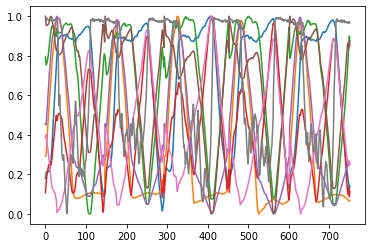

In [6]:
plt.plot(data_1)
plt.plot(data_2)
plt.plot(data_3)
plt.plot(data_4)
plt.plot(data_5)
plt.plot(data_6)
plt.plot(data_7)
plt.plot(data_8)
plt.show()

In [7]:
time_len = 5
data_num = np.size(data_1)

In [8]:
for i in range(data_num-time_len):
    if i == 0:
        input_1_temp = data_1[i:i+time_len]
        target_1_temp = data_1[i+1:i+time_len+1]
        
        input_2_temp = data_2[i:i+time_len]
        target_2_temp = data_2[i+1:i+time_len+1]
        
        input_3_temp = data_3[i:i+time_len]
        target_3_temp = data_3[i+1:i+time_len+1]
        
        input_4_temp = data_4[i:i+time_len]
        target_4_temp = data_4[i+1:i+time_len+1]
        
        input_5_temp = data_5[i:i+time_len]
        target_5_temp = data_5[i+1:i+time_len+1]
        
        input_6_temp = data_6[i:i+time_len]
        target_6_temp = data_6[i+1:i+time_len+1]
        
        input_7_temp = data_7[i:i+time_len]
        target_7_temp = data_7[i+1:i+time_len+1]
        
        input_8_temp = data_8[i:i+time_len]
        target_8_temp = data_8[i+1:i+time_len+1]
    else:
        input_1_temp = np.vstack([input_1_temp, data_1[i:i+time_len]])
        target_1_temp = np.vstack([target_1_temp, data_1[i+1:i+time_len+1]])
        
        input_2_temp = np.vstack([input_2_temp, data_2[i:i+time_len]])
        target_2_temp = np.vstack([target_2_temp, data_2[i+1:i+time_len+1]])
        
        input_3_temp = np.vstack([input_3_temp, data_3[i:i+time_len]])
        target_3_temp = np.vstack([target_3_temp, data_3[i+1:i+time_len+1]])
        
        input_4_temp = np.vstack([input_4_temp, data_4[i:i+time_len]])
        target_4_temp = np.vstack([target_4_temp, data_4[i+1:i+time_len+1]])
        
        input_5_temp = np.vstack([input_5_temp, data_5[i:i+time_len]])
        target_5_temp = np.vstack([target_5_temp, data_5[i+1:i+time_len+1]])
        
        input_6_temp = np.vstack([input_6_temp, data_6[i:i+time_len]])
        target_6_temp = np.vstack([target_6_temp, data_6[i+1:i+time_len+1]])
        
        input_7_temp = np.vstack([input_7_temp, data_7[i:i+time_len]])
        target_7_temp = np.vstack([target_7_temp, data_7[i+1:i+time_len+1]])
        
        input_8_temp = np.vstack([input_8_temp, data_8[i:i+time_len]])
        target_8_temp = np.vstack([target_8_temp, data_8[i+1:i+time_len+1]])

In [9]:
data_num = np.shape(target_1_temp)[0]
print(data_num)

746


In [10]:
print(np.shape(input_1_temp))

(746, 5)


## numpy 2 torch

In [11]:
# input
input_1 = torch.from_numpy(input_1_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_2 = torch.from_numpy(input_2_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_3 = torch.from_numpy(input_3_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_4 = torch.from_numpy(input_4_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_5 = torch.from_numpy(input_5_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_6 = torch.from_numpy(input_6_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_7 = torch.from_numpy(input_7_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
input_8 = torch.from_numpy(input_8_temp).unsqueeze(2).type_as(torch.FloatTensor()) 

# target
target_1 = torch.from_numpy(target_1_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_2 = torch.from_numpy(target_2_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_3 = torch.from_numpy(target_3_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_4 = torch.from_numpy(target_4_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_5 = torch.from_numpy(target_5_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_6 = torch.from_numpy(target_6_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_7 = torch.from_numpy(target_7_temp).unsqueeze(2).type_as(torch.FloatTensor()) 
target_8 = torch.from_numpy(target_8_temp).unsqueeze(2).type_as(torch.FloatTensor()) 

In [12]:
training_num = int(data_num*(5/5))
# test_num = int(data_num/5)
# training_num, test_num, training_num + test_num

In [13]:
training_input = np.concatenate((input_1[0:training_num],
                                 input_2[0:training_num],
                                 input_3[0:training_num],
                                 input_4[0:training_num],
                                 input_5[0:training_num],
                                 input_6[0:training_num],
                                 input_7[0:training_num],
                                 input_8[0:training_num]
                                ),2)

training_target = np.concatenate((target_1[0:training_num],
                                  target_2[0:training_num],
                                  target_3[0:training_num],
                                  target_4[0:training_num],
                                  target_5[0:training_num],
                                  target_6[0:training_num],
                                  target_7[0:training_num],
                                  target_8[0:training_num]
                                 ),2)
'''
test_input = np.concatenate((input_1[training_num:training_num+test_num],
                             input_2[training_num:training_num+test_num],
                             input_3[training_num:training_num+test_num],
                             input_4[training_num:training_num+test_num],
                             input_5[training_num:training_num+test_num],
                             input_6[training_num:training_num+test_num]
                            ),2)

test_target = np.concatenate((target_1[training_num:training_num+test_num],
                              target_2[training_num:training_num+test_num],
                              target_3[training_num:training_num+test_num],
                              target_4[training_num:training_num+test_num],
                              target_5[training_num:training_num+test_num],
                              target_6[training_num:training_num+test_num]
                             ),2)
'''
'''
def max_min(data):
    return (data - data.min())/ (data.max()-data.min())

print(training_input.max())
print(training_input.min())
print(training_target.max())
print(training_target.min())

training_input = max_min(training_input)
training_target = max_min(training_target)
test_input = max_min(test_input)
test_target = max_min(test_target)
'''


training_input = torch.from_numpy(training_input).type_as(torch.FloatTensor())
training_target = torch.from_numpy(training_target).type_as(torch.FloatTensor())
'''
test_input = torch.from_numpy(test_input).type_as(torch.FloatTensor())
test_target = torch.from_numpy(test_target).type_as(torch.FloatTensor())
'''



'\ntest_input = torch.from_numpy(test_input).type_as(torch.FloatTensor())\ntest_target = torch.from_numpy(test_target).type_as(torch.FloatTensor())\n'

In [14]:
np.shape(training_input)

torch.Size([746, 5, 8])

In [15]:
batch_size = training_num
seq_len = time_len
num_layers = 5
input_size = 8
hidden_size = 256
lr = 0.01
num_epochs = 2000

In [16]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size,num_layers):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.dense = nn.Linear(hidden_size, 8)
        
    def forward(self,inp,hidden,cell):
        output,(hidden,cell) = self.lstm(inp,(hidden,cell))
        output = self.dense(output)
        return output,hidden,cell
    
    def init_hidden_cell(self):
        hidden = torch.zeros(num_layers, batch_size, hidden_size)
        cell = torch.zeros(num_layers, batch_size, hidden_size)
        return hidden,cell
    


In [17]:
# gpu가 사용 가능한 경우에는 device를 gpu로 설정하고 불가능하면 cpu로 설정합니다.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Loss function & Optimizer
rnn = RNN(input_size,hidden_size, num_layers).to(device)

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(rnn.parameters(), lr=lr)

cuda:0


----------------
epochs: 0
tensor(0.4260, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


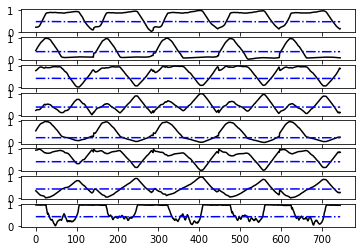

----------------
epochs: 100
tensor(0.0171, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


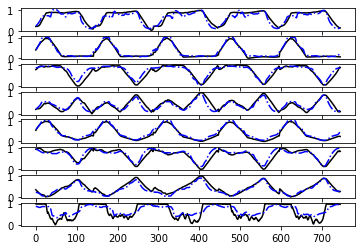

----------------
epochs: 200
tensor(0.0026, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


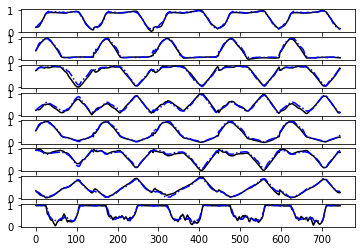

----------------
epochs: 300
tensor(0.0019, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


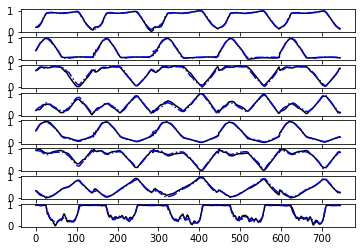

----------------
epochs: 400
tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


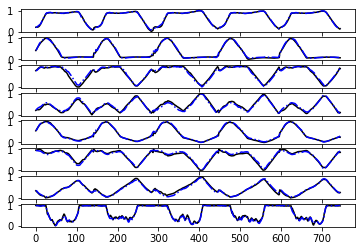

----------------
epochs: 500
tensor(0.0017, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


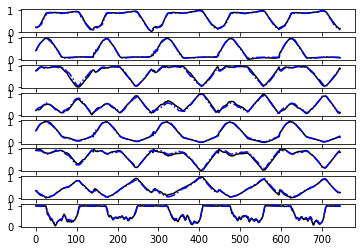

----------------
epochs: 600
tensor(0.0014, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


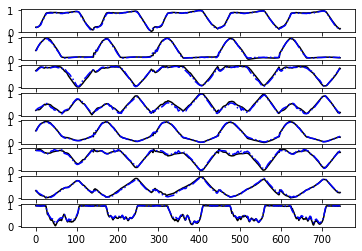

----------------
epochs: 700
tensor(0.0015, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


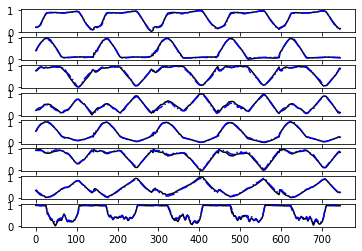

----------------
epochs: 800
tensor(0.0007, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


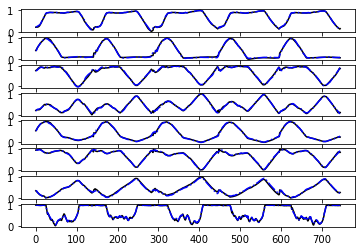

----------------
epochs: 900
tensor(0.0005, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


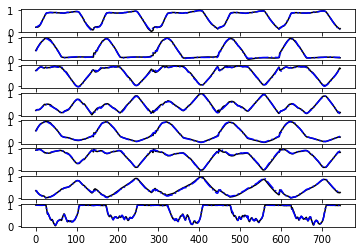

----------------
epochs: 1000
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


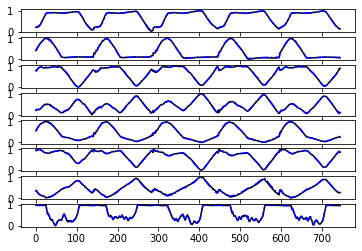

----------------
epochs: 1100
tensor(0.0004, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


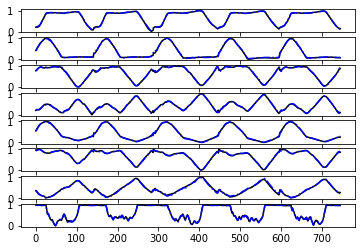

----------------
epochs: 1200
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


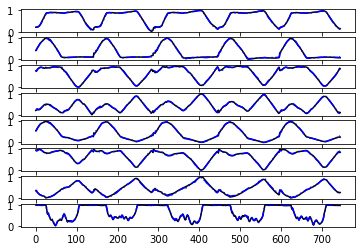

----------------
epochs: 1300
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


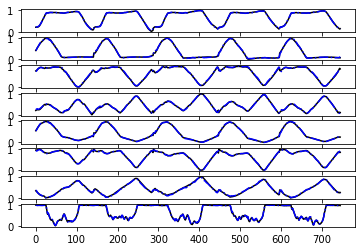

----------------
epochs: 1400
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


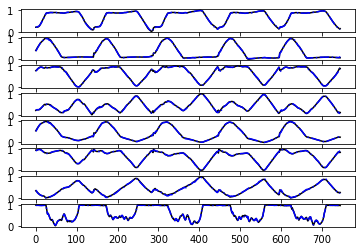

----------------
epochs: 1500
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


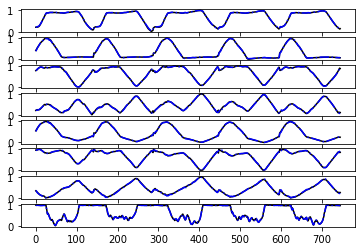

----------------
epochs: 1600
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


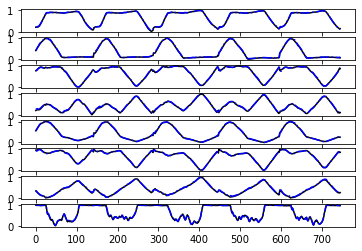

----------------
epochs: 1700
tensor(0.0003, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


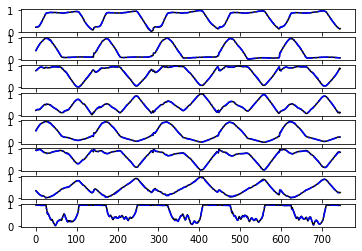

----------------
epochs: 1800
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


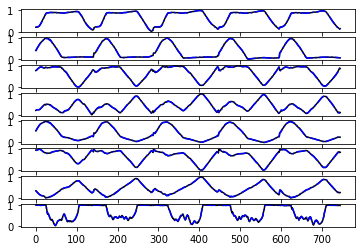

----------------
epochs: 1900
tensor(0.0002, device='cuda:0', grad_fn=<MseLossBackward>)
----------------


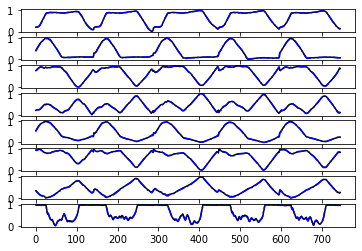

In [18]:
old_loss = 99999999
loss_arr =[]
training_data_num = np.shape(training_input)[0]

for i in range(num_epochs):                 
    input = training_input[0*batch_size:(1)*batch_size].to(device)
    for j in range(0, np.int64(training_data_num/batch_size)):
    
        optimizer.zero_grad()
        hidden,cell = rnn.init_hidden_cell()
        
        hidden = hidden.to(device) 
        cell = cell.to(device) 
        
        # input = training_input[j*batch_size:(j+1)*batch_size].to(device)
        target = training_target[j*batch_size:(j+1)*batch_size].to(device)   
        output, hidden, cell = rnn(input,hidden,cell)
            
        
        loss = loss_func(output,target)        
        loss.backward()
        optimizer.step()        
        
        input[:,0:4,:] = input[:,1:5,:]
        input[:,4:5,:] = output[:,4:5,:].clone().detach()
    

    if i % 100 == 0:
        print('----------------')
        #print('output:'+str(output.squeeze()[0,7])+', GT:'+str(label[0]))    
        print('epochs: '+str(i))
        print(loss)
        loss_arr.append(loss.cpu().detach().numpy())
        print('----------------')
        
        
        with torch.no_grad(): # 기울기를 계산 하지 않음
            test_data_num = np.shape(training_input)[0]
            test_total =[]
            input = training_input[0:batch_size].to(device)

            for j in range(0, np.int64(training_data_num/batch_size)):

                optimizer.zero_grad()
                hidden,cell = rnn.init_hidden_cell()

                hidden = hidden.to(device) 
                cell = cell.to(device) 

                # input = training_input[j*batch_size:(j+1)*batch_size].to(device)

                output, hidden, cell = rnn(input,hidden,cell)

                input[:,0:4,:] = input[:,1:5,:]
                input[:,4:5,:] = output[:,4:5,:].clone().detach()
                
                test = output.cpu().detach().numpy()
                test = test.squeeze()

                if j == 0:
                    test_total = test
                else:
                    test_total = np.vstack([test_total, test])
        '''
        if old_loss > loss:            
            old_loss = loss        
            torch.save(rnn,'./model/lstm.pkl')
    
        '''
        '''
        plt.plot(training_target[:,time_len-1,:], color='r', linewidth=3.0)
        plt.plot(test_total[:,time_len-1,:], color='k', linewidth=1.0)
        plt.show()
        '''
        '''
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot3D(training_target[:,time_len-1,0], training_target[:,time_len-1,1],training_target[:,time_len-1,2], '-.k')
        ax.plot3D(test_total[:,time_len-1,0],test_total[:,time_len-1,1],test_total[:,time_len-1,2],'-b')
        plt.show()
        '''
        fig = plt.figure()
        for i in range(1,9):
            ax = fig.add_subplot(810+i)
            ax.plot(training_target[:,time_len-1,i-1], '-k')
            ax.plot(test_total[:,time_len-1,i-1], '-.b')
        plt.show()
        
        
   

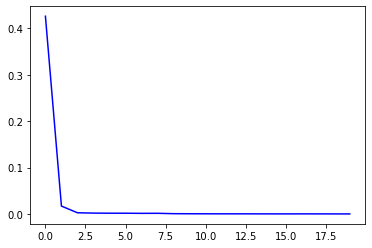

In [19]:
plt.plot(loss_arr,'-b')

plt.show()

In [20]:
# model restore if any
try:
    rnn = torch.load('./model/lstm.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass
  
try:
  os.mkdir("./model")
except:
  pass

try:
  os.mkdir("./result")
except:
  pass


--------model not restored--------



C:\Users\jo\anaconda3\envs\py38\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
C:\Users\jo\anaconda3\envs\py38\lib\site-packages\mpl_toolkits\mplot3d\proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys, zs, np.ones_like(xs)])


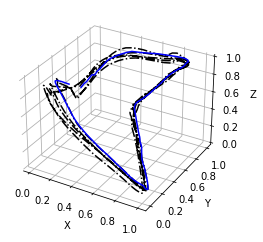

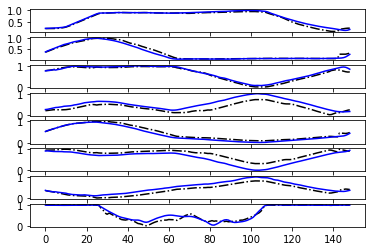

In [26]:
%matplotlib notebook
%matplotlib inline
torch.set_printoptions(precision=3)

test_total =[]
# input = test_input[1].reshape(1, time_len, 12).to(device)
input = training_input[0].reshape(1,time_len, input_size).to(device)
input = input.cpu().detach().numpy() # + np.random.normal(0, 0.01, input.shape)
input = torch.from_numpy(input).type_as(torch.FloatTensor()).to(device)

for j in range(0,int((training_num-1)/5)): # range(0, 1000):#len(test_input)):
#for j in range(0,int(training_num)):
    optimizer.zero_grad()
    hidden = torch.zeros(num_layers, 1, hidden_size).to(device) 
    cell = torch.zeros(num_layers, 1, hidden_size).to(device) 
    
    output, hidden, cell = rnn(input,hidden,cell)
    
    test = output.cpu().detach().numpy()
    test = test # + np.random.normal(0, .005, test.shape)
    # input = test_input[j].reshape(1, time_len, input_size).to(device) 
    # input = training_input[j].reshape(1, time_len, input_size).to(device) 
    # test1= input.cpu().detach().numpy()
    # test = np.round(test,3)
    
    input[:,0:4,:] = input[:,1:5,:].clone().detach()
    input[:,4:5,:] = output[:,4:5,:].clone().detach()
    # input = 
    # input = output
    test = test.squeeze()
    
    # if np.linalg.norm(test - test1) < 1e-2:
        # print(np.linalg.norm(test - test1))
        # input = torch.from_numpy(np.random.normal(test,0.05)).float().reshape(1, 20, 7).to(device)
    # print(np.linalg.norm(test - test1) < 1e-4)
    
    # numpy.random.normal(2*X+2,20)
    
    if j == 0:
        test_total = test[time_len-1,:]
        # test_total = test[0,:]
    else:
        test_total = np.vstack([test_total, test[time_len-1,:]])
        
    # input = test_input[j*batch_size:(j+1)*batch_size].to(device)

# print(test_total)
# print(np.shape(test[19,:]))
fig = plt.figure()
# ax = plt.axes(projection='3d')
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# ax.plot3D(data_1, data_2, data_3, '-.k')
ax.plot3D(training_input[:,time_len-1,0], training_input[:,time_len-1,1],training_input[:,time_len-1,2], '-.k')
ax.plot3D(test_total[:,0],test_total[:,1], test_total[:,2],'-b')
# ax.plot3D(exp_state[:, 0], exp_state[:, 1], exp_state[:, 2], '--b')
# ax.set_xlim(.2, .4)
# ax.set_ylim(-.3, .3)
# ax.set_zlim(.45, .85)
#ax = plt.gca()
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

# Bonus: To get rid of the grid as well:
# ax.grid(False)
fig = plt.figure()
for i in range(1,9):
    ax = fig.add_subplot(810+i)
    ax.plot(training_input[0:int((training_num-1)/5),time_len-1,i-1], '-.k')
    # ax.plot(training_input[0:training_num,time_len-1,i-1], '-.k')
    ax.plot(test_total[:,i-1], '-b')


In [27]:
init_value = training_input[0].reshape(time_len, input_size).to(device)
# init_value = init_value[0:time_len-1, :]
init_value = init_value.cpu().detach().numpy()

print(np.shape(init_value))
print(np.shape(test_total))
test_total = np.concatenate((init_value, test_total),0)

print(np.shape(test_total))

(5, 8)
(149, 8)
(154, 8)


In [28]:
df = pd.DataFrame(test_total)
df.to_csv('./2. learning_data/test1/feature_data_lstm_test_data.csv', index=False, encoding='cp949')